# Learning Packet Analysis with Scapy

In [2]:
from scapy.all import * # Packet manipulation
import pandas as pd # Pandas - Create and Manipulate DataFrames
import numpy as np # Math Stuff (don't worry only used for one line :] )
import binascii # Binary to Ascii 
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline



### The line below will attempt to sniff 100 packets


In [3]:
num_of_packets_to_sniff = 100
pcap = sniff(count=num_of_packets_to_sniff)
pcap1 = sniff(count=num_of_packets_to_sniff)
# rdpcap returns packet list
## packetlist object can be enumerated 
print(type(pcap))
print(len(pcap))
print(pcap)
pcap[0]

<class 'scapy.plist.PacketList'>
100
<Sniffed: TCP:72 UDP:16 ICMP:0 Other:12>


<Ether  dst=00:0e:09:86:b4:53 src=00:5d:73:e4:20:07 type=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=92 id=35062 flags=DF frag=0 ttl=63 proto=tcp chksum=0x84a src=74.125.24.189 dst=172.16.155.17 |<TCP  sport=https dport=49920 seq=1824547404 ack=2845824246 dataofs=5 reserved=0 flags=PA window=602 chksum=0x5bb3 urgptr=0 |<Raw  load='\x17\x03\x03\x00/\\xf5\\x86\\xd8\\xe0\\xac&\\xbe\x0b\\xbbv\\xfd~\x02\\xf4\\x82(&\\xd0\\xeb)\\x9a\\x983\\x90D\\xcc\tFS*\x0c\\xb2\\xb8\\xca@߅|/\\xd7j\\xf8\\xdc\\xdeo\\xb8b' |>>>>

# Append Krack/Kr00k pcap to current stream

In [4]:
# rdpcap used to Read Pcap
pcap = pcap +  rdpcap("krack_data_Ana.pcap")
pcap1 = pcap1 +  rdpcap("kr00k_data_Ana.pcap")

In [5]:
pcap[101]

<RadioTap  version=0 pad=0 len=56 present=Flags+Channel+dBm_AntSignal+RXFlags+MCS+A_MPDU+timestamp+RadiotapNS+Ext Ext=[<RadioTapExtendedPresenceMask  present=b5+b11+b29+Ext |>, <RadioTapExtendedPresenceMask  present=b37+b43 |>] Flags=FCS ChannelFrequency=2472 ChannelFlags=2GHz+Dynamic_CCK_OFDM dBm_AntSignal=-33 dBm RXFlags= knownMCS=guard_interval Ness_LSB=0 STBC_streams=0 FEC_type=BCC HT_format=mixed guard_interval=Long_GI MCS_bandwidth=20MHz MCS_index=0 A_MPDU_ref=0 A_MPDU_flags= timestamp=1171691223 ts_accuracy=22 ts_position=17 ts_flags=3 notdecoded='\\xdc\x00\\xdf\x01' |<Dot11FCS  subtype=QoS Data type=Data proto=0 FCfield=from-DS+retry+protected ID=12288 addr1=24:f5:a2:ea:86:c3 (RA=DA) addr2=0c:9d:92:54:fe:30 (TA=BSSID) addr3=0c:9d:92:54:fe:30 (SA) SC=41360 fcs=0x3da7c0a1 |<Dot11QoS  A_MSDU_Present=0 Ack_Policy=0 EOSP=0 TID=0 TXOP=0 |<Dot11CCMP  PN0=17 PN1=138 res0=0 key_id=0 ext_iv=1 res1=0 PN2=0 PN3=0 PN4=0 PN5=0 data='J\\xeb{\\x88\n\\xfa\\xa5D]\x0740\\xf4\\x8b\\x99\\xf1з\\xaf\

# 802.11 FCS/QOS/CCMP Segment
#### Frames/Packets/Segments each encapsulated layer consists of fields

# Exploring an item in packet list

In [6]:
# Radio -> 802.11 -> Layer 2 Segments
# We're only interested in Layers 2 (802.11) 
## When capturing we capture layer 2 frames and beyond

# Retrieving a single item from packet list
radio_frame = pcap[103]
wireless_packet = radio_frame.payload
segment = wireless_packet.payload
dot11_ccmp = segment.payload
data = dot11_ccmp.payload # Retrieve payload that comes after layer 4

# Observe that we just popped off previous layer header
print(radio_frame.summary())
print(wireless_packet.summary())
print(segment.summary())
print(dot11_ccmp.summary())
print(data.summary()) # If blank, empty object

# Complete depiction of paket
## Achieving understanding that these are the fields will enable the ability 
## to ask the data more meaningful questions ie) type of layer 4 segment is defined in layer 3 packet
radio_frame.show()

RadioTap / 802.11 Data QoS Data 0c:9d:92:54:fe:30 (TA=BSSID) > 24:f5:a2:ea:86:c3 (RA=DA) / Dot11QoS / Dot11CCMP
802.11 Data QoS Data 0c:9d:92:54:fe:30 (TA=BSSID) > 24:f5:a2:ea:86:c3 (RA=DA) / Dot11QoS / Dot11CCMP
Dot11QoS / Dot11CCMP
Dot11CCMP

###[ RadioTap ]### 
  version   = 0
  pad       = 0
  len       = 56
  present   = Flags+Channel+dBm_AntSignal+RXFlags+MCS+A_MPDU+timestamp+RadiotapNS+Ext
  \Ext       \
   |###[ RadioTap Extended presence mask ]### 
   |  present   = b5+b11+b29+Ext
   |###[ RadioTap Extended presence mask ]### 
   |  present   = b37+b43
  Flags     = FCS
  ChannelFrequency= 2472
  ChannelFlags= 2GHz+Dynamic_CCK_OFDM
  dBm_AntSignal= -33 dBm
  RXFlags   = 
  knownMCS  = guard_interval
  Ness_LSB  = 0
  STBC_streams= 0
  FEC_type  = BCC
  HT_format = mixed
  guard_interval= Long_GI
  MCS_bandwidth= 20MHz
  MCS_index = 0
  A_MPDU_ref= 0
  A_MPDU_flags= 
  timestamp = 1171691223
  ts_accuracy= 22
  ts_position= 17
  ts_flags  = 3
  notdecoded= '\\xdc\x00\\xdf\x01'


In [7]:
# Radio -> 802.11 -> Layer 2 Segments
# We're only interested in Layers 2 (802.11) 
## When capturing we capture layer 2 frames and beyond

# Retrieving a single item from packet list
radio_frame1 = pcap1[103]
wireless_packet1 = radio_frame1.payload
segment1 = wireless_packet1.payload
dot11_ccmp1 = segment1.payload
data1 = dot11_ccmp1.payload # Retrieve payload that comes after layer 4

# Observe that we just popped off previous layer header
print(radio_frame1.summary())
print(wireless_packet1.summary())
print(segment1.summary())
print(dot11_ccmp1.summary())
print(data1.summary()) # If blank, empty object

# Complete depiction of paket
## Achieving understanding that these are the fields will enable the ability 
## to ask the data more meaningful questions ie) type of layer 4 segment is defined in layer 3 packet
radio_frame1.show()

RadioTap / 802.11 Control CTS None (TA) > 0c:9d:92:54:fe:34 (RA)
802.11 Control CTS None (TA) > 0c:9d:92:54:fe:34 (RA)



###[ RadioTap ]### 
  version   = 0
  pad       = 0
  len       = 56
  present   = TSFT+Flags+Rate+Channel+dBm_AntSignal+RXFlags+timestamp+RadiotapNS+Ext
  \Ext       \
   |###[ RadioTap Extended presence mask ]### 
   |  present   = b5+b11+b29+Ext
   |###[ RadioTap Extended presence mask ]### 
   |  present   = b37+b43
  mac_timestamp= 8267364917
  Flags     = FCS
  Rate      = 24.0 Mbps
  ChannelFrequency= 5180
  ChannelFlags= OFDM+5GHz
  dBm_AntSignal= -65 dBm
  RXFlags   = 
  timestamp = 3972397602
  ts_accuracy= 22
  ts_position= 17
  ts_flags  = 3
  notdecoded= '\\xbf\x00\\xb3\x01'
###[ 802.11-FCS ]### 
     subtype   = CTS
     type      = Control
     proto     = 0
     FCfield   = 
     ID        = 54272
     addr1     = 0c:9d:92:54:fe:34 (RA)
     fcs       = 0x99aa0a54



### Understanding object types in scapy and Importing layers

In [8]:
# Understanding the object types in scapy
print(type(radio_frame))
print(type(wireless_packet))
print(type(segment))
print(type(dot11_ccmp))


# Packets can be filtered on layers ie) radio_frame[scapy.layers.l2.Ether]
radio_type = type(radio_frame)
wireless_type = type(wireless_packet)
qos_type = type(segment)
ccmp_type = type(dot11_ccmp)
print("Radio",pcap[radio_type])
print("802.11", pcap[wireless_type])
print("QoS", pcap[qos_type])
print("CCMP", pcap[ccmp_type])

# Scapy provides this via import statements
from scapy.layers.dot11 import RadioTap
from scapy.layers.dot11 import Dot11FCS
from scapy.layers.dot11 import Dot11QoS
from scapy.layers.dot11 import Dot11CCMP



<class 'scapy.layers.dot11.RadioTap'>
<class 'scapy.layers.dot11.Dot11FCS'>
<class 'scapy.layers.dot11.Dot11QoS'>
<class 'scapy.layers.dot11.Dot11CCMP'>
Radio <RadioTap from Sniffed+krack_data_Ana.pcap: TCP:0 UDP:0 ICMP:0 Other:9625>
802.11 <Dot11FCS from Sniffed+krack_data_Ana.pcap: TCP:0 UDP:0 ICMP:0 Other:9625>
QoS <Dot11QoS from Sniffed+krack_data_Ana.pcap: TCP:0 UDP:0 ICMP:0 Other:7631>
CCMP <Dot11CCMP from Sniffed+krack_data_Ana.pcap: TCP:0 UDP:0 ICMP:0 Other:7611>


In [9]:
# Understanding the object types in scapy
print(type(radio_frame1))
print(type(wireless_packet1))
print(type(segment1))
print(type(dot11_ccmp1))


# Packets can be filtered on layers ie) radio_frame[scapy.layers.l2.Ether]
radio_type1 = type(radio_frame1)
wireless_type1 = type(wireless_packet1)
qos_type1 = type(segment1)
ccmp_type1 = type(dot11_ccmp1)
print("Radio",pcap[radio_type1])
print("802.11", pcap[wireless_type1])
print("QoS", pcap[qos_type1])
print("CCMP", pcap[ccmp_type1])

# Scapy provides this via import statements
from scapy.layers.dot11 import RadioTap
from scapy.layers.dot11 import Dot11FCS
from scapy.layers.dot11 import Dot11QoS
from scapy.layers.dot11 import Dot11CCMP



<class 'scapy.layers.dot11.RadioTap'>
<class 'scapy.layers.dot11.Dot11FCS'>
<class 'scapy.packet.NoPayload'>
<class 'scapy.packet.NoPayload'>
Radio <RadioTap from Sniffed+krack_data_Ana.pcap: TCP:0 UDP:0 ICMP:0 Other:9625>
802.11 <Dot11FCS from Sniffed+krack_data_Ana.pcap: TCP:0 UDP:0 ICMP:0 Other:9625>
QoS <NoPayload from Sniffed+krack_data_Ana.pcap: TCP:0 UDP:0 ICMP:0 Other:0>
CCMP <NoPayload from Sniffed+krack_data_Ana.pcap: TCP:0 UDP:0 ICMP:0 Other:0>


# Convert PCAP to DataFrame

In [10]:
# Collect field names from FCS/QoS/CCMP (These will be columns in DF)
fcs_fields = [field.name for field in Dot11FCS().fields_desc]
qos_fields = [field.name for field in Dot11QoS().fields_desc]
ccmp_fields = [field.name for field in Dot11CCMP().fields_desc]
print(fcs_fields)
dataframe_fields = fcs_fields  + qos_fields + ccmp_fields
print(dataframe_fields)
# Create blank DataFrame
df = pd.DataFrame(columns=dataframe_fields)
for packet in pcap[Dot11FCS]:
    # Field array for each row of DataFrame
    field_values = []
    for field in fcs_fields:
        #print(field)
        try:
            if field == 'cfe' or field == 'addr4':
                
                #field_values.append(len(packet[Dot11FCS].fields[field]))
                field_values.append(1)
            else:
                field_values.append(packet[Dot11FCS].fields[field])
        except: 
            field_values.append(0)
    #field_values.append(packet.time)
    
    layer_type = type(packet[Dot11FCS].payload)
    #print('--->')
    #print(layer_type)
    for field in qos_fields:
        try:
            field_values.append(packet[layer_type].fields[field])
        except: 
            field_values.append(0)
       
    layer_type1 = type(packet[Dot11FCS].payload.payload)    
    #print(layer_type1)
    #print('--->')
    for field in ccmp_fields:
        try:
            field_values.append(packet[layer_type1].fields[field])
        except:
            field_values.append(None)
    
    # Add row to DF
    df_append = pd.DataFrame([field_values], columns=dataframe_fields)
    df = pd.concat([df, df_append], axis=0)

# Reset Index
df = df.reset_index()
# Drop old index column
df = df.drop(columns="index")

['subtype', 'type', 'proto', 'cfe', 'FCfield', 'ID', 'addr1', 'addr2', 'addr3', 'SC', 'addr4', 'fcs']
['subtype', 'type', 'proto', 'cfe', 'FCfield', 'ID', 'addr1', 'addr2', 'addr3', 'SC', 'addr4', 'fcs', 'A_MSDU_Present', 'Ack_Policy', 'EOSP', 'TID', 'TXOP', 'PN0', 'PN1', 'res0', 'key_id', 'ext_iv', 'res1', 'PN2', 'PN3', 'PN4', 'PN5', 'data']


In [11]:
# Collect field names from FCS/QoS/CCMP (These will be columns in DF)
fcs_fields1 = [field.name for field in Dot11FCS().fields_desc]
qos_fields1 = [field.name for field in Dot11QoS().fields_desc]
ccmp_fields1 = [field.name for field in Dot11CCMP().fields_desc]
print(fcs_fields1)
dataframe_fields1 = fcs_fields1  + qos_fields1 + ccmp_fields1
print(dataframe_fields1)
# Create blank DataFrame
df1 = pd.DataFrame(columns=dataframe_fields1)
for packet in pcap1[Dot11FCS]:
    # Field array for each row of DataFrame
    field_values1 = []
    # Add all IP fields to dataframe
    for field in fcs_fields1:
        #print(field)
        try:
            if field == 'cfe' or field == 'addr4':
                # Retrieving number of options defined in IP Header
                #field_values.append(len(packet[Dot11FCS].fields[field]))
                field_values1.append(1)
            else:
                field_values1.append(packet[Dot11FCS].fields[field])
        except: 
            field_values1.append(0)
    #field_values.append(packet.time)
    
    layer_type1 = type(packet[Dot11FCS].payload)
    #print('--->')
    #print(layer_type)
    for field in qos_fields1:
        try:
            field_values1.append(packet[layer_type1].fields[field])
        except: 
            field_values1.append(0)
       
    layer_type2 = type(packet[Dot11FCS].payload.payload)    
    #print(layer_type1)
    #print('--->')
    for field in ccmp_fields1:
        try:
            field_values1.append(packet[layer_type2].fields[field])
        except:
            field_values1.append(None)
    
    # Add row to DF
    df_append1 = pd.DataFrame([field_values1], columns=dataframe_fields)
    df1 = pd.concat([df1, df_append1], axis=0)

# Reset Index
df1 = df1.reset_index()
# Drop old index column
df1 = df1.drop(columns="index")

['subtype', 'type', 'proto', 'cfe', 'FCfield', 'ID', 'addr1', 'addr2', 'addr3', 'SC', 'addr4', 'fcs']
['subtype', 'type', 'proto', 'cfe', 'FCfield', 'ID', 'addr1', 'addr2', 'addr3', 'SC', 'addr4', 'fcs', 'A_MSDU_Present', 'Ack_Policy', 'EOSP', 'TID', 'TXOP', 'PN0', 'PN1', 'res0', 'key_id', 'ext_iv', 'res1', 'PN2', 'PN3', 'PN4', 'PN5', 'data']


### DataFrame Basics

In [12]:
# Retrieve first row from DataFrame
print(df.iloc[0])

print(df.shape)

# Return first 5 rows
df.head()

# Return last 5 rows
df.tail()

# Return the Source Address for all rows
df['addr1']

# Return Src Address, Dst Address, Src Port, Dst Port
df[['ID','addr1','addr2','fcs','PN0']]

subtype                                                           8
type                                                              2
proto                                                             0
cfe                                                               1
FCfield                                     from-DS+retry+protected
ID                                                            12288
addr1                                             24:f5:a2:ea:86:c3
addr2                                             0c:9d:92:54:fe:30
addr3                                             0c:9d:92:54:fe:30
SC                                                            41344
addr4                                                             1
fcs                                                       816948214
A_MSDU_Present                                                    0
Ack_Policy                                                        0
EOSP                                            

,ID,addr1,addr2,fcs,PN0
0,12288,24:f5:a2:ea:86:c3,0c:9d:92:54:fe:30,816948214,16
1,12288,24:f5:a2:ea:86:c3,0c:9d:92:54:fe:30,1034404001,17
2,12288,24:f5:a2:ea:86:c3,0c:9d:92:54:fe:30,1240870107,18
3,12288,24:f5:a2:ea:86:c3,0c:9d:92:54:fe:30,3135839170,19
4,12288,24:f5:a2:ea:86:c3,0c:9d:92:54:fe:30,2043329118,20
...,...,...,...,...,...
9620,12288,24:f5:a2:ea:86:c3,0c:9d:92:54:fe:30,2425337062,17
9621,12288,24:f5:a2:ea:86:c3,0c:9d:92:54:fe:30,986370354,18
9622,12288,24:f5:a2:ea:86:c3,0c:9d:92:54:fe:30,2819835884,19
9623,0,0c:9d:92:54:fe:30,24:f5:a2:ea:86:c3,3568094436,None


# Statistics

In [13]:
# Top Source Adddress
print("# Top Source Address")
print(df['addr3'].describe(),'\n\n')

print("# Top subtype Address of krack")
print(df['subtype'].describe(),'\n\n')

print("# Top subtype Address of krook")
print(df1['subtype'].describe(),'\n\n')

print("# Top Source Address")
print(df.groupby('addr3').describe(),'\n\n')


# Top Destination Address
print("# Top Destination Address")
print(df['addr1'].describe(),"\n\n")

frequent_address = df['addr3'].describe()['top']

# Who is the top address speaking to
print("# Who is Top Address Speaking to?")
print(df[df['addr3'] == frequent_address]['addr1'].unique(),"\n\n")


print("# Associated id with top source addres")
print(df[df['addr3'] == frequent_address]['SC'].unique(),"\n\n")


print("# associated fcs with top source address")
print(df[df['addr3'] == frequent_address]['fcs'].unique(),"\n\n")

# Top Source Address
count                  9625
unique                    5
top       0c:9d:92:54:fe:30
freq                   7723
Name: addr3, dtype: object 


# Top subtype Address of krack
count     9625
unique       8
top          8
freq      7667
Name: subtype, dtype: int64 


# Top subtype Address of krook
count     25484
unique        9
top           8
freq       8381
Name: subtype, dtype: int64 


# Top Source Address
                  subtype                   type                  proto  \
                    count unique top  freq count unique top  freq count   
addr3                                                                     
0                    1897      4   9   858  1897      1   1  1897  1897   
00:0c:29:cf:08:aa       3      1   8     3     3      1   2     3     3   
0c:9d:92:54:fe:30    7723      7   8  7663  7723      2   2  7634  7723   
94:e9:79:82:c5:77       1      1   0     1     1      1   2     1     1   
ff:ff:ff:ff:ff:ff       1      1   8     1 

In [14]:
# Unique Source Addresses
print("Unique Source Addresses")
print(df['addr3'].unique())

print("Unique subtype Addresses")
print(df['subtype'].unique())

print("Unique subtype Addresses")
print(df1['subtype'].unique())

print()

# Unique Destination Addresses
print("Unique Destination Addresses")
print(df['addr1'].unique())

Unique Source Addresses
['0c:9d:92:54:fe:30' 0 '00:0c:29:cf:08:aa' 'ff:ff:ff:ff:ff:ff'
 '94:e9:79:82:c5:77']
Unique subtype Addresses
[8 9 11 12 0 5 13 1]
Unique subtype Addresses
[12 8 11 9 5 4 13 10 0]

Unique Destination Addresses
['24:f5:a2:ea:86:c3' '0c:9d:92:54:fe:30' 'ff:ff:ff:ff:ff:ff'
 '00:c0:ca:a8:26:3e' '94:e9:79:82:c5:77' '01:80:c2:00:00:0e'
 '01:80:c2:00:00:00' '0c:9d:92:71:cf:7b' '4c:9d:92:54:fe:30'
 '04:9d:92:54:fe:30']


      krack  krook
type              
0        89     39
1      1897  17055
2      7639   8390
type
0      89
1    1897
2    7639
Name: count, dtype: int64
type
0       39
1    17055
2     8390
Name: count, dtype: int64


<AxesSubplot:title={'center':'frame type (Manag/control/data)'}, xlabel='type'>

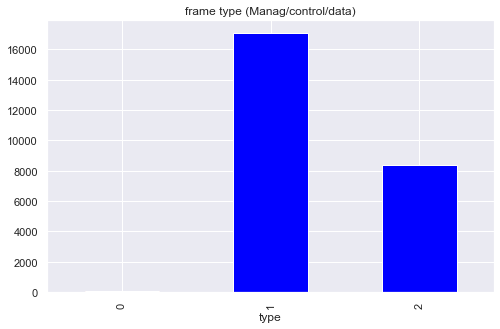

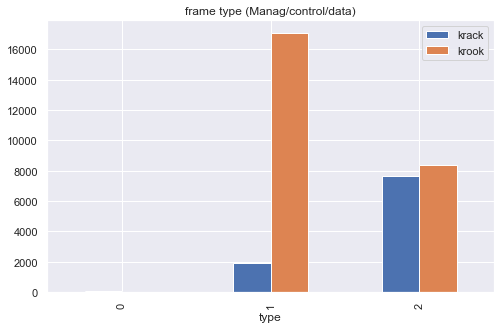

In [15]:
frame_type = (df.groupby("type").describe()['subtype']['count'])
frame_type1 = (df1.groupby("type").describe()['subtype']['count'])
#frame_type= frame_type.join(frame_type1)
data = {"krack": frame_type,
        "krook": frame_type1,
        }
  
# Concatenating the series side
# by side as depicted by axis=1
# If you want to concatenate the 
# series one below the other
# change the axis to zero.
df3 = pd.concat(data,
               axis = 1)
  
# show the dataframe
print(df3)
print(frame_type)
print(frame_type1)
frame_type.plot(kind='bar', title="frame type (Manag/control/data)",figsize=(8,5), color='red')
frame_type1.plot(kind='bar', title="frame type (Manag/control/data)",figsize=(8,5), color='blue')
df3.plot(kind='bar', title="frame type (Manag/control/data)",figsize=(8,5))



type
0      89
1    1897
2    7639
Name: count, dtype: int64


<AxesSubplot:title={'center':'frame type (Manag/control/data)'}, ylabel='type'>

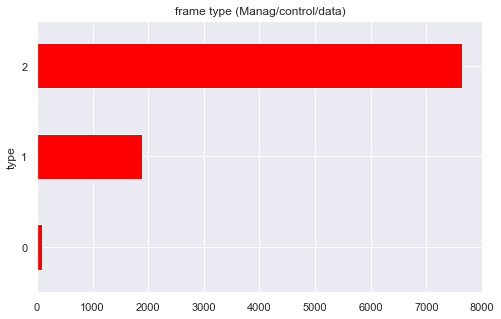

In [16]:
# Group by Source Address and Payload Sum
frame_type = (df.groupby("type").describe()['subtype']['count'])
print(frame_type)
frame_type.plot(kind='barh', title="frame type (Manag/control/data)",figsize=(8,5), color='red')



type  subtype
0     0             1
      1             1
      5             5
      8            38
      11            3
      13           41
1     9           858
      11          531
      12          494
      13           14
2     0             8
      8          7629
      12            2
Name: count, dtype: int64


<AxesSubplot:title={'center':'Type of request(beacon,auth,asso....)'}, xlabel='type,subtype'>

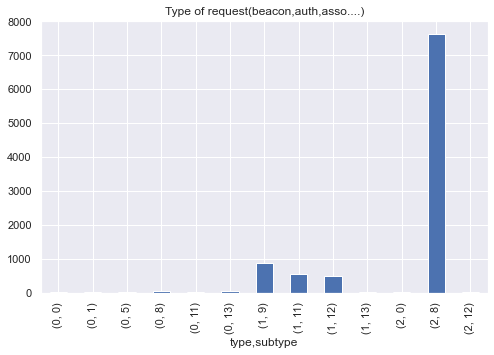

In [55]:
frame_type1 = (df.groupby(["type","subtype"])).describe()['proto']['count']
print(frame_type1)
frame_type1.plot(kind='bar', label = 'subtype', title="Type of request(beacon,auth,asso....)",figsize=(8,5), use_index='false')

               krack   krook
type subtype                
0    0           1.0     NaN
     1           1.0     NaN
     5           5.0     NaN
     8          38.0    37.0
     11          3.0     NaN
     13         41.0     2.0
1    5           NaN   335.0
     8           NaN    36.0
     9         858.0  4472.0
     11        531.0  7799.0
     12        494.0  4340.0
     13         14.0    73.0
2    0           8.0    31.0
     4           NaN    24.0
     8        7629.0  8308.0
     10          NaN     2.0
     12          2.0    25.0
type  subtype
0     0             1
      1             1
      5             5
      8            38
      11            3
      13           41
1     9           858
      11          531
      12          494
      13           14
2     0             8
      8          7629
      12            2
Name: count, dtype: int64
type  subtype
0     8            37
      13            2
1     5           335
      8            36
      9          4472

<AxesSubplot:title={'center':'Type of request(beacon,auth,asso....)'}, xlabel='type,subtype'>

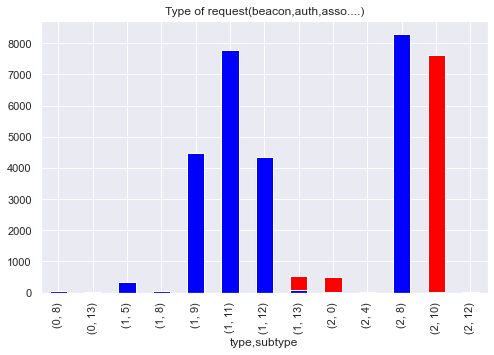

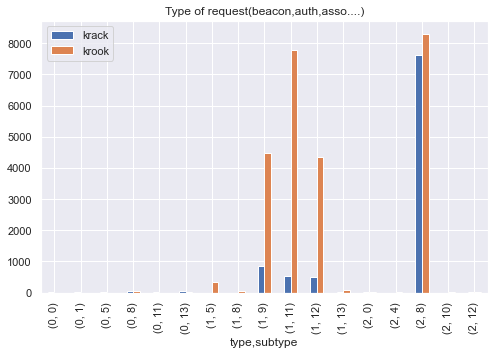

In [56]:
#frame_type = (df.groupby("subtype").describe()['type']['count'])
frame_type = (df.groupby(["type","subtype"])).describe()['proto']['count']

#frame_type3 = (df.groupby(["type","subtype"]))
#frame_type1 = (df1.groupby("subtype").describe()['type']['count'])
frame_type1 = (df1.groupby(["type","subtype"])).describe()['proto']['count']

#frame_type= frame_type.join(frame_type1)
data = {"krack": frame_type,
        "krook": frame_type1,
        }
  
# Concatenating the series side
# by side as depicted by axis=1
# If you want to concatenate the 
# series one below the other
# change the axis to zero.
df3 = pd.concat(data,
               axis = 1)
  
# show the dataframe
print(df3)
#print(frame_type3.first())
print(frame_type)
print(frame_type1)
frame_type.plot(kind='bar', title="Type of request(beacon,auth,asso....)",figsize=(8,5), color='red')
frame_type1.plot(kind='bar', title="Type of request(beacon,auth,asso....)",figsize=(8,5), color='blue')
df3.plot(kind='bar', title="Type of request(beacon,auth,asso....)",figsize=(8,5))



# Graphing

addr3
0                        0.000000
00:00:0c:07:ac:15    85115.066937
00:00:0c:07:ac:95       41.346856
00:00:0c:af:8c:00      962.304260
00:00:ec:4f:ac:15      896.778905
Name: SC, dtype: float64


<AxesSubplot:title={'center':'source Addresses (Bytes Received)'}, ylabel='addr3'>

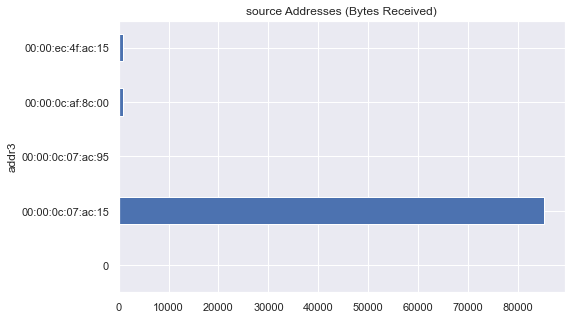

In [189]:
# Group by Source Address and Payload Sum
source_addresses = (df.groupby("addr3")['SC'].sum()/493*16).head()
print(source_addresses)
source_addresses.plot(kind='barh', title="source Addresses (Bytes Received)",figsize=(8,5))

addr1
e0:d4:64:85:4e:7c     889584
ea:6d:39:a3:85:3a    6908864
f4:43:5c:3c:37:94          0
f5:3d:dd:dd:04:77      60519
ff:ff:ff:ff:ff:ff    4335216
Name: SC, dtype: int64


<AxesSubplot:title={'center':'Destination Addresses (Bytes Received)'}, ylabel='addr1'>

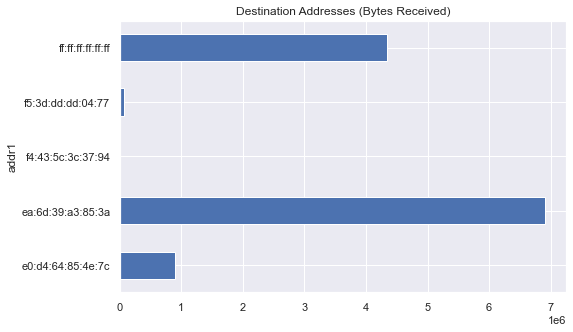

In [190]:
# Group by Destination Address and Payload Sum
destination_addresses = (df.groupby("addr1")['SC'].sum()).tail()
print(destination_addresses)
destination_addresses.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

<AxesSubplot:title={'center':'Destination Addresses (Bytes Received)'}, ylabel='addr3'>

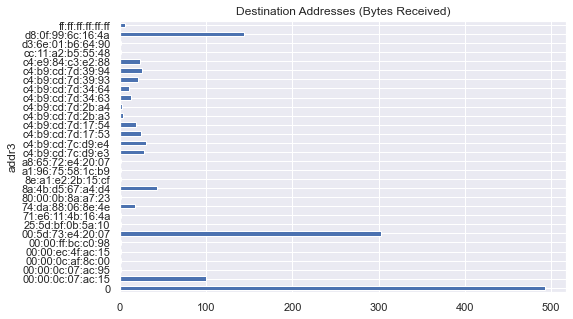

In [188]:
dest_freq=df.groupby('addr3').describe()['SC']['count']
dest_freq.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

<AxesSubplot:title={'center':'Destination Addresses (Bytes Received)'}, ylabel='addr1'>

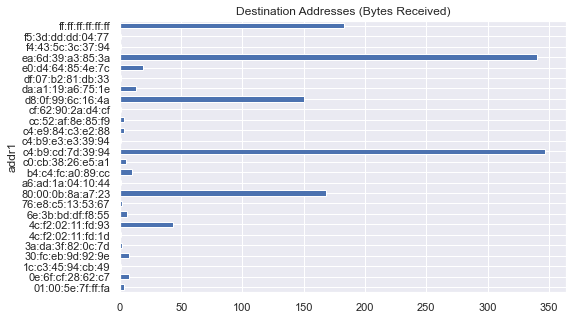

In [192]:
dest_freq=df.groupby('addr1').describe()['ID']['count']
dest_freq.plot(kind='barh', title="Destination Addresses (Bytes Received)",figsize=(8,5))

Text(0.5, 1.0, 'History of bytes sent by most frequent address')

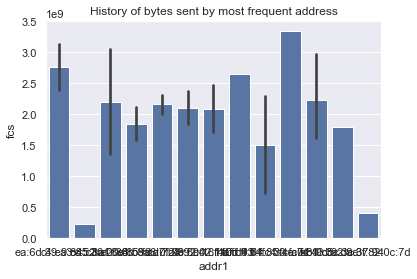

In [206]:
#groupby("time")['payload'].sum().plot(kind='barh',title="Destination Ports (Bytes Received)",figsize=(8,5))

frequent_address_df = df[df['addr3'] == frequent_address]
x = frequent_address_df['fcs'].tolist()
sns.barplot(x="addr1", y="fcs", data=frequent_address_df[['fcs','addr1']],
            label="Total", color="b").set_title("History of bytes sent by most frequent address")


# Payload Investigation